## Dataset Information

This dataset allows you to study, analyze and recognize elements in the images. That’s exactly how your camera detects your face, using image recognition! It’s a digit recognition problem. This data set has 49,000 images of 28 X 28 size, totalling 49 MB.

## Import Modules

In [ ]:
# !pip install tensorflow-gpu keras

In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

## Unzip the train data|

In [3]:
!unzip Train_UQcUa52.zip

Streaming output truncated to the last 5000 lines.
 extracting: Images/train/55.png     
 extracting: Images/train/550.png    
 extracting: Images/train/5500.png   
 extracting: Images/train/5501.png   
 extracting: Images/train/5502.png   
 extracting: Images/train/5503.png   
 extracting: Images/train/5504.png   
 extracting: Images/train/5505.png   
 extracting: Images/train/5506.png   
 extracting: Images/train/5507.png   
 extracting: Images/train/5508.png   
 extracting: Images/train/5509.png   
 extracting: Images/train/551.png    
 extracting: Images/train/5510.png   
 extracting: Images/train/5511.png   
 extracting: Images/train/5512.png   
 extracting: Images/train/5513.png   
 extracting: Images/train/5514.png   
 extracting: Images/train/5515.png   
 extracting: Images/train/5516.png   
 extracting: Images/train/5517.png   
 extracting: Images/train/5518.png   
 extracting: Images/train/5519.png   
 extracting: Images/train/552.png    
 extracting: Images/train/5520.png   

## Load the data

In [4]:
df = pd.read_csv('train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [5]:
!pwd

/content


In [6]:
image_path = 'Images/train/'

In [8]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i], target_size=(28,28,1), grayscale=True))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')

In [9]:
y = df['label']

In [10]:
print(X.shape, y.shape)

(49000, 28, 28, 1) (49000,)


## Exploratory Data Analysis

4


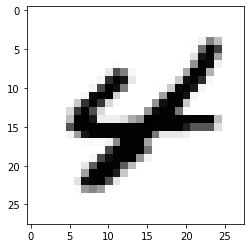

In [11]:
image_index = 0
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

2


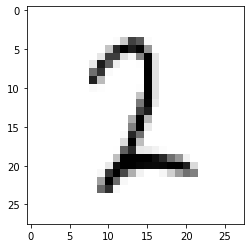

In [12]:
image_index = 10
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

7


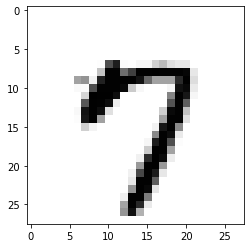

In [13]:
image_index = 100
print(y[image_index])
plt.imshow(X[image_index].reshape(28,28), cmap='Greys')

## Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=np.array(y))

## Normalization

In [16]:
# x_train[0]

In [17]:
x_train /= 255
x_test /= 255

In [19]:
# x_train[0]

## Model Creation

In [20]:
input_shape = (28,28,1)
output_class = 10

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# define the model
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [24]:
# train the model
model.fit(x=x_train, y=y_train, batch_size=32, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1149/1149 [==============================] - 10s 3ms/step - loss: 0.4816 - accuracy: 0.8475 - val_loss: 0.1202 - val_accuracy: 0.9637
Epoch 2/30
1149/1149 [==============================] - 4s 3ms/step - loss: 0.1336 - accuracy: 0.9605 - val_loss: 0.0848 - val_accuracy: 0.9743
Epoch 3/30
1149/1149 [==============================] - 4s 3ms/step - loss: 0.0863 - accuracy: 0.9732 - val_loss: 0.0807 - val_accuracy: 0.9742
Epoch 4/30
1149/1149 [==============================] - 4s 3ms/step - loss: 0.0685 - accuracy: 0.9783 - val_loss: 0.0734 - val_accuracy: 0.9788
Epoch 5/30
1149/1149 [==============================] - 4s 3ms/step - loss: 0.0543 - accuracy: 0.9825 - val_loss: 0.0690 - val_accuracy: 0.9809
Epoch 6/30
1149/1149 [==============================] - 4s 3ms/step - loss: 0.0461 - accuracy: 0.9844 - val_loss: 0.0684 - val_accuracy: 0.9808
Epoch 7/30
1149/1149 [==============================] - 4s 3ms/step - loss: 0.0360 - accuracy: 0.9873 - val_loss: 0.0743 - val_accuracy

## Testing the model

Predicted output: 1


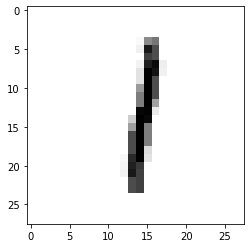

In [27]:
image_index = 10
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())

Predicted output: 8


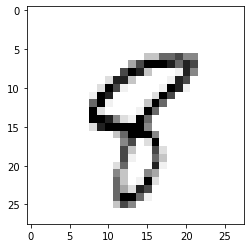

In [28]:
image_index = 100
# print("Original output:",y_test[image_index])
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Predicted output:", pred.argmax())